# Actividad Integradora 1

## Equipo 1

David Alonso Cantú Martínez A00822455

Jesús Omar Cuenca Espino    A01378844

Nadia Corina García Orozco  A01242428

Luis Cossío Ramírez A011876634

## Sección 1 Web Scraping

### Request of the page that holds the data

In [1]:
import requests
URL = "https://www.worldometers.info/coronavirus/"
page = requests.get(URL)

### Beautiful soup code that gets the correct section of the web page that holds the daily cases of coraonavirus

In [2]:
import re
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content,"html.parser")
result = soup.find("script",type="text/javascript",string=re.compile("coronavirus-cases-daily"))
if(result != None):
    print(result)
else:
    print("Nothing Found!")

<script type="text/javascript">
    Highcharts.chart('coronavirus-cases-linear', {
        chart: {
            type: 'line'
        },
        title: {
            text: 'Total Cases'
        },

        subtitle: {
            text: '(Linear Scale)'
        },

        xAxis: {
            categories: ["Jan 22, 2020","Jan 23, 2020","Jan 24, 2020","Jan 25, 2020","Jan 26, 2020","Jan 27, 2020","Jan 28, 2020","Jan 29, 2020","Jan 30, 2020","Jan 31, 2020","Feb 01, 2020","Feb 02, 2020","Feb 03, 2020","Feb 04, 2020","Feb 05, 2020","Feb 06, 2020","Feb 07, 2020","Feb 08, 2020","Feb 09, 2020","Feb 10, 2020","Feb 11, 2020","Feb 12, 2020","Feb 13, 2020","Feb 14, 2020","Feb 15, 2020","Feb 16, 2020","Feb 17, 2020","Feb 18, 2020","Feb 19, 2020","Feb 20, 2020","Feb 21, 2020","Feb 22, 2020","Feb 23, 2020","Feb 24, 2020","Feb 25, 2020","Feb 26, 2020","Feb 27, 2020","Feb 28, 2020","Feb 29, 2020","Mar 01, 2020","Mar 02, 2020","Mar 03, 2020","Mar 04, 2020","Mar 05, 2020","Mar 06, 2020","Mar 07, 2020","Mar

### Preparation code to make the data parsing easier

In [3]:
dataInitIndex = result.string.index("coronavirus-cases-daily")
data = (result.string[dataInitIndex:]).replace('\n',"")
categoriesTag = "categories: "
dataTag = "data: "
import numpy as np

### Separation of the xAxis (dates of the number of cases)

In [4]:
xAxis_init = data[data.index(categoriesTag):]
xAxis = xAxis_init[len(categoriesTag) + 1:xAxis_init.index("]")]
xAxis = xAxis.split('","')
xAxis[0] = xAxis[0].replace('"',"")
xAxis[-1] = xAxis[-1].replace('"',"")
xAxis[:10]

['Jan 22, 2020',
 'Jan 23, 2020',
 'Jan 24, 2020',
 'Jan 25, 2020',
 'Jan 26, 2020',
 'Jan 27, 2020',
 'Jan 28, 2020',
 'Jan 29, 2020',
 'Jan 30, 2020',
 'Jan 31, 2020']

### Separation of the yAxis (the number of cases per date) in int form

In [5]:
yAxis_init = data[data.index(dataTag):]
yAxis = yAxis_init[len(dataTag) + 1:yAxis_init.index("]")]
yAxis = yAxis.split(',')
yAxis = np.array([int(x) if x != "null" else 0 for x in yAxis])
yAxis[:10]

array([   0,  271,  475,  701,  787, 1784, 1479, 1763, 2016, 2138])

## Graphic representation of the data extracted from the website using matplotlib

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

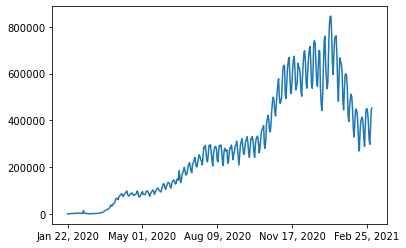

In [7]:
ax = plt.axes()
# plt.xlabel("Days")
# plt.ylabel("# of cases")
# plt.title("Daily Cases of Covid")
# plt.plot(xAxis,yAxis,color="orange")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(xAxis,yAxis)

In [8]:
x = np.arange(len(xAxis))
x.shape
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
x = x.reshape(-1,1)
x.shape

(408, 1)

In [10]:
yAxis

array([     0,    271,    475,    701,    787,   1784,   1479,   1763,
         2016,   2138,   2626,   2857,   3253,   3927,   3728,   3184,
         3453,   2685,   3004,   2569,   2050,  14180,   5175,   2681,
         2132,   2158,   2031,   1880,    534,   1034,   1058,   1038,
          629,    992,    861,   1135,   1456,   1818,   2202,   2630,
         2610,   3300,   3176,   4289,   5102,   5747,   5890,   7206,
         8730,  11267,  13258,  16507,  17125,  19170,  20462,  22809,
        26868,  31737,  38509,  33391,  36497,  44394,  44850,  48980,
        61642,  66469,  67387,  61116,  64910,  75756,  78685,  81339,
        86654,  83773,  74371,  77952,  84226,  89420,  90811,  98402,
        86159,  77058,  77036,  80340,  87102,  87689,  89710,  84862,
        78606,  83107,  81605,  84586,  86592,  98256,  91465,  75036,
        71823,  78241,  81569,  89495,  95860,  83833,  83437,  82629,
        83726,  97395,  96895,  97396,  89431,  80923,  74442,  88556,
      

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,yAxis,test_size=0.33,random_state=42)

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.predict([[412]])

array([652893.9756251])

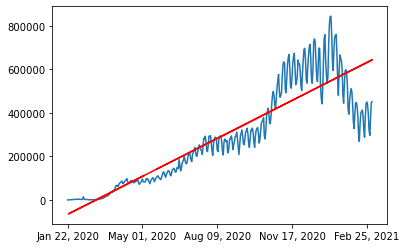

In [15]:
ax = plt.axes()
# plt.xlabel("Days")
# plt.ylabel("# of cases")
# plt.title("Daily Cases of Covid")
# plt.plot(xAxis,yAxis,color="orange")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.plot(xAxis,yAxis)
plt.plot(X_train, lr.predict(X_train),color='red')